<a href="https://colab.research.google.com/github/kapoorp99/stress-detection-ml-model/blob/main/StressDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import nltk
import re
import string
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns #visualization library

In [15]:
df = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/stress.csv")

In [ ]:
df.columns

Index(['subreddit', 'post_id', 'sentence_range', 'text', 'id', 'label',
       'confidence', 'social_timestamp', 'social_karma', 'syntax_ari',
       ...
       'lex_dal_min_pleasantness', 'lex_dal_min_activation',
       'lex_dal_min_imagery', 'lex_dal_avg_activation', 'lex_dal_avg_imagery',
       'lex_dal_avg_pleasantness', 'social_upvote_ratio',
       'social_num_comments', 'syntax_fk_grade', 'sentiment'],
      dtype='object', length=116)

In [ ]:
print(df.isnull().sum())

subreddit                   0
post_id                     0
sentence_range              0
text                        0
id                          0
                           ..
lex_dal_avg_pleasantness    0
social_upvote_ratio         0
social_num_comments         0
syntax_fk_grade             0
sentiment                   0
Length: 116, dtype: int64


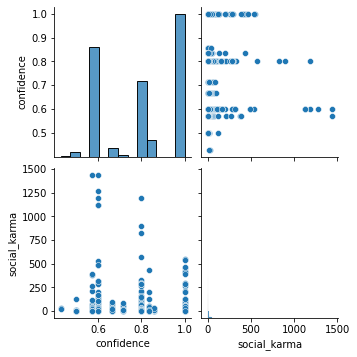

In [ ]:
sns.pairplot(df[['confidence','social_karma']])

In [ ]:
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

In [ ]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
df["text"] = df["text"].apply(clean)

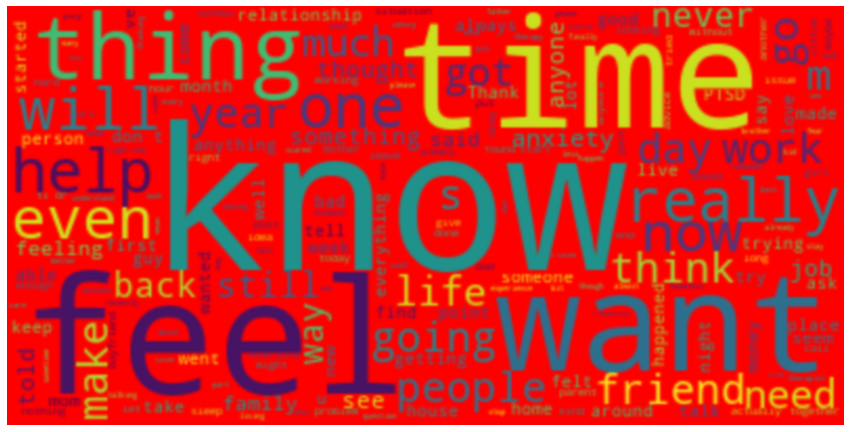

In [14]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = " ".join(i for i in df.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="red").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bicubic')
plt.axis("off")
plt.show()

In [16]:
df["label"] = df["label"].map({0: "No Stress", 1: "Stress"})
data = df[["text", "label"]]
print(data.head())

                                                text      label
0  He said he had not felt that way before, sugge...     Stress
1  Hey there r/assistance, Not sure if this is th...  No Stress
2  My mom then hit me with the newspaper and it s...     Stress
3  until i met my new boyfriend, he is amazing, h...     Stress
4  October is Domestic Violence Awareness Month a...     Stress


In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [17]:
x = np.array(data["text"])
y = np.array(data["label"])

In [18]:
cv = CountVectorizer()
X = cv.fit_transform(x)
xtrain, xtest, ytrain, ytest = train_test_split(X, y, 
                                                test_size=0.33, 
                                                random_state=42)

In [19]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(xtrain, ytrain)

BernoulliNB()

In [20]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model.predict(data)
print(output)

Enter a Text: low is not new to me, its as always
['No Stress']


In [ ]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model.predict(data)
print(output)